In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
T=1
M=100
N=1000

def simple_a(x):
    return np.array((x-1/3)*(x-2/3))

def pos_a(x):
    a_vec=simple_a(x)
    null_vec=np.zeros(len(x))
    arr=np.maximum(null_vec, a_vec)
    return arr

def neg_a(x):
    null_vec=np.zeros(len(x))
    a_vec=-simple_a(x)
    arr=np.maximum(null_vec, a_vec)
    return arr
        
def tridiag(lower, diag, upper):
    return np.diag(lower, -1) + np.diag(diag) + np.diag(upper, 1)    

def plot_solutionTest(U, angle=-30, title="Title"):
    x_len = len(U[:, ])
    t_len = len(U[0])
    
    x=np.linspace(0, 1, x_len) 
    t=np.linspace(0, T, t_len)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), subplot_kw={"projection": "3d"})
    tt, xx = np.meshgrid(t, x)
    ax.plot_surface(tt, xx, U, cmap=cm.coolwarm)
    ax.view_init(azim=angle)              # Rotate the figure
    ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('u')
    fig.tight_layout()
    
def RHS(tt, xx):
    t ,x =np.meshgrid(tt, xx)
    return 2*np.pi*simple_a(x)*np.cos(2*np.pi*x)*np.exp(-t**2) - 2*t*np.sin(2*np.pi*x)*np.exp(-t**2)

def v_exact_func(t, x):  
    return np.sin(2*np.pi*x)*np.exp(-t**2)

In [3]:
def init_test(x):
    return np.sin(2*np.pi*x) #x**2 #np.exp(-(x-2)*(x-2)) # 1-np.sin(2*np.pi*x)*x**2 

def init_noRHS(x):
    return np.exp(-(x-2)*(x-2))

def bc_test(t):
    return init_test(-simple_a(0)*t)

def LAX_Wenderoff(M, T, N, u_init, u_bc):
    
    h=1/M
    k=T/N
    
    t=np.linspace(0, T, N+1)
    x=np.linspace(0, 1, M+1)
    
    U=np.zeros((M+1, N+1))
    
    U[:, 0]=u_init(x)
    U[0, :]=u_bc(t)

    r = k/h*(pos_a(x)[:] - neg_a(x)[:])
    
    plt.plot(x,np.abs(r))
    plt.show()
    
    lower=1/2*(r**2 + r)[1:]
    middle=np.ones(len(x))-r**2
    upper=1/2*(r**2-r)[:-1]
    
    A=tridiag(lower, middle, upper)
    CFL=k/h*simple_a(x)
    
    F=RHS(t, x)
    for n in range(N):

        U[:, n+1]=A@U[:, n]  + k*F[:, n]
        
        U[M, n+1] = U[M-1,n+1]
        
    return U, x, t, CFL


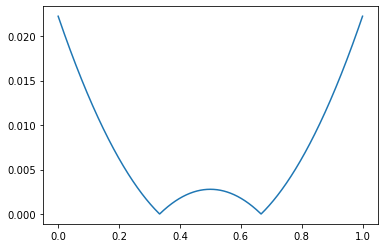

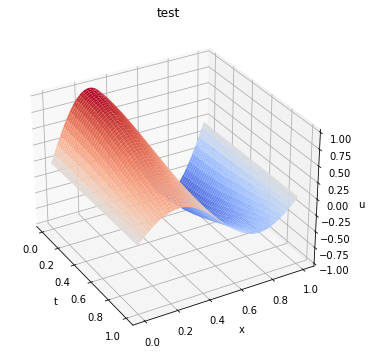

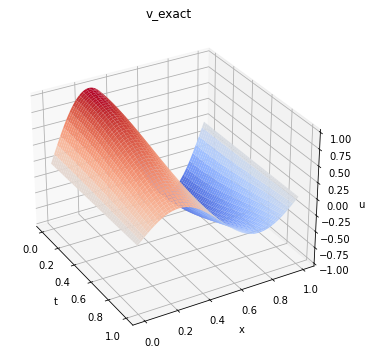

In [6]:
T=1
M=1000
N=10000

test, testx, testt, CFL=LAX_Wenderoff(M, T, N, init_test, bc_test)

#noRHS, noRHSx, noRHSt, noRHSCFL=LAX_Wenderoff(M, T, N, init_noRHS, bc_test)

#print(noRHSCFL)

#plot_solutionTest(noRHS, ,title="Solution")

#plt.figure()
#plt.title("Solution at different x values")
#plt.plot(noRHS[0, :], label="Init")
#plt.plot(noRHS[25, :])
#plt.plot(noRHS[50, :])
#plt.plot(noRHS[75, :])
#plt.plot(noRHS[100, :], label = "last")
#plt.legend()
#plt.show()

plot_solutionTest(test, angle=-30, title="test")

xxx=np.linspace(0, 1, M+1)   
ttt=np.linspace(0, T, N+1)
tt, xx = np.meshgrid(ttt,xxx)
v_exact = v_exact_func(tt,xx)



plot_solutionTest(v_exact, angle=-30, title="v_exact")
